# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [107]:
dataset_train = pd.read_csv('Google_Stock_Price_Training_Data.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [108]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [109]:
X_train = []
y_train = []
for i in range(60, 2525):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [110]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [112]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [113]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [114]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [115]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [116]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [117]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [118]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [119]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
39/39 [==============================] - 6s 64ms/step - loss: 0.0308
Epoch 2/100
39/39 [==============================] - 2s 64ms/step - loss: 0.0040
Epoch 3/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0034
Epoch 4/100
39/39 [==============================] - 3s 65ms/step - loss: 0.0032
Epoch 5/100
39/39 [==============================] - 3s 68ms/step - loss: 0.0029
Epoch 6/100
39/39 [==============================] - 3s 67ms/step - loss: 0.0030
Epoch 7/100
39/39 [==============================] - 3s 70ms/step - loss: 0.0036
Epoch 8/100
39/39 [==============================] - 3s 67ms/step - loss: 0.0028
Epoch 9/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0028
Epoch 10/100
39/39 [==============================] - 3s 76ms/step - loss: 0.0025
Epoch 11/100
39/39 [==============================] - 3s 76ms/step - loss: 0.0025
Epoch 12/100
39/39 [==============================] - 3s 77ms/step - loss: 0.0026
Epoch 13/100
39/39 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of February 2024

In [120]:
dataset_test = pd.read_csv('Google_Stock_Price_Testing_Data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2024

In [121]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


### Visualising the results

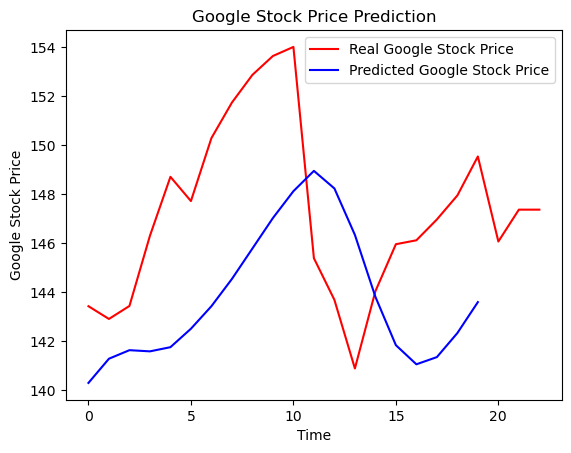

In [122]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()